In [1]:
import sys
sys.path.append("..")

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_pickle("../GITIGNORE_DATA/filtering_people_orgs_result.pkl")
df.head(2)

,LINK_ID,PREFERRED_NAME,TITLE_NAME,FIRSTMID_NAME,LASTSUFF_NAME,SUFFIX_NAME,HONORARY_SUFFIX,GENDER,BRIEF_BIO,DESCRIPTION,NOTE,BIRTH_DATE,BIRTH_PLACE,DEATH_DATE,DEATH_PLACE,CAUSE_OF_DEATH,NATIONALITY,OCCUPATION,WEBSITE,AFFILIATION,LINGUISTIC_GROUP,TYPE,REFERENCE_NUMBER,SOURCE,CREATE_DATE,UPDATE_DATE,res_ALL_NOTES,res_WIKIDATA_IDs,res_URLS,qcodes_filtered
1,10245,"Zenthon, Edward Rupert",NaN,Edward Rupert,Zenthon,NaN,NaN,M,Y,REF: http://www.iwm.org.uk/collections/item/object/1030031461,nan,1920-07,"London, Greater London, England, United Kingdom",c. 2002,NaN,NaN,British,engineer,NaN,NaN,NaN,NaN,NaN,N,28-JAN-98,05-AUG-15,REF: http://www.iwm.org.uk/collections/item/object/1030031461 --- nan,[],[http://www.iwm.org.uk/collections/item/object/1030031461],[]
2,10269,"Troughton, John",NaN,John,Troughton,NaN,NaN,M,Y,"1739 - Born in Corney, Cumbria, England; Apprenticed to his Uncle John Troughton \n1764 - traded at Surrey St., Strand, London \n1768-71 - traded at Crown Court, Fleet St., London\n1771-78 - traded at 17 Dean St., Fetter Lane, London \n1778-82 - traded at 1 Queen's Sq., Bartholomew Close, London \n1782 - purchased the business of Benjamin Cole \n1782-1788 - traded at the sign of the Orrery, 136 Fleet St, London, England. \n1788-1804 - in partnership as J & E Troughton, with brother Edward Troughton (1756-1835)","ODNB: Anita McConnell, ‘Troughton, Edward (1753–1835)’, Oxford Dictionary of National Biography, Oxford University Press, 2004; online edn, May 2005 [http://www.oxforddnb.com/view/article/27767]\nREF: A. McConnell, Instrument makers to the world: a history of Cooke, Troughton & Simms (1992) · A. W. Skempton and J. Brown, ‘John and Edward Troughton’, Notes and Records of the Royal Society, 27 (1972–3), 233–62",1739,"Broughton in Furness, Cumbria, England, United Kingdom",1807,"London, Greater London, England, United Kingdom",NaN,English; British,mathematical instrument maker,NaN,NaN,NaN,NaN,NaN,N,28-JAN-98,06-NOV-18,"1739 - Born in Corney, Cumbria, England; Apprenticed to his Uncle John Troughton \n1764 - traded at Surrey St., Strand, London \n1768-71 - traded at Crown Court, Fleet St., London\n1771-78 - traded at 17 Dean St., Fetter Lane, London \n1778-82 - traded at 1 Queen's Sq., Bartholomew Close, London \n1782 - purchased the business of Benjamin Cole \n1782-1788 - traded at the sign of the Orrery, 136 Fleet St, London, England. \n1788-1804 - in partnership as J & E Troughton, with brother Edward Troughton (1756-1835) --- ODNB: Anita McConnell, ‘Troughton, Edward (1753–1835)’, Oxford Dictionary of National Biography, Oxford University Press, 2004; online edn, May 2005 [http://www.oxforddnb.com/view/article/27767]\nREF: A. McConnell, Instrument makers to the world: a history of Cooke, Troughton & Simms (1992) · A. W. Skempton and J. Brown, ‘John and Edward Troughton’, Notes and Records of the Royal Society, 27 (1972–3), 233–62",[Q1293897],[http://www.oxforddnb.com/view/article/27767],[]


## create new dataframe that can be read by `d3fdgraph`
i.e.
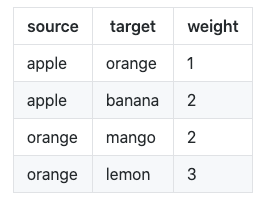

In [29]:
source_col = "PREFERRED_NAME"
target_col = "qcodes_filtered"
df_with_links = df.loc[(df[target_col].map(lambda d: len(d)) > 0), [source_col, target_col]]
df_with_links[target_col] = df_with_links['qcodes_filtered'].apply(lambda i: str(i[0]))
df_with_links = df_with_links.rename(columns={source_col: "source", target_col: "target"})
df_with_links['weight'] = 1
df_with_links

,source,target,weight
3,"Link, O Winston",Q2007300,1
10,"Engelmann, Wilhelm",Q90261,1
23,"Mercer, Thomas",Q18759224,1
42,"Jacquard, Joseph Marie",Q310833,1
57,"Hillingford, Robert Alexander",Q7341431,1
...,...,...,...
17803,Physical Science Study Committee,Q3901751,1
17824,"Linke - Hofmann Werke, Breslau",Q432790,1
17874,Bundeskunsthalle,Q879960,1
17880,Inverness Museum & Art Gallery,Q16848391,1


48


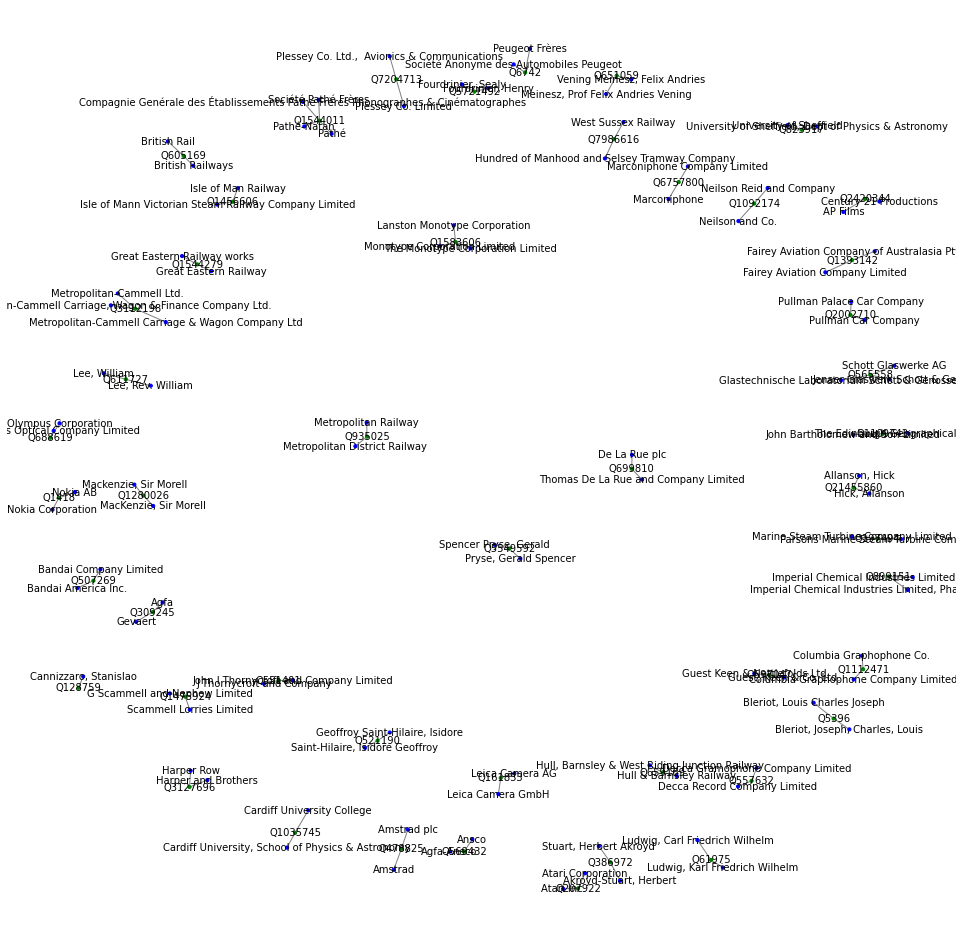

In [52]:
links_vc = df_with_links['target'].value_counts()
targets_plot = links_vc[links_vc > 1].index.tolist()
print(len(targets_plot))
df_plot = df_with_links[df_with_links['target'].isin(targets_plot)]

G = nx.from_pandas_edgelist(df_plot, 'source', 'target')

colors = []
for node in G:
    if node in df_plot["source"].values:
        colors.append("blue")
    else: colors.append("green")

fig, ax = plt.subplots(figsize=(17,17))
nx.draw(G, node_color=colors, with_labels=True, font_size=10, node_size=10, edge_color='grey', pos=nx.spring_layout(G))